In [1]:
import json
from networkx.readwrite import json_graph

# Try reading the data back in -- writing this function for Jonathan
def read_data_for_jonathan():
    with open('data/possessions_for_jonathan.json', 'r') as f:
        possessions_for_jonathan = json.load(f)
    
    for possession in possessions_for_jonathan:
        possession['attacking_graph'] = json_graph.node_link_graph(possession['attacking_graph'])
        possession['defensive_graphs'] = [json_graph.node_link_graph(G_defense) for G_defense in possession['defensive_graphs']]

    return possessions_for_jonathan

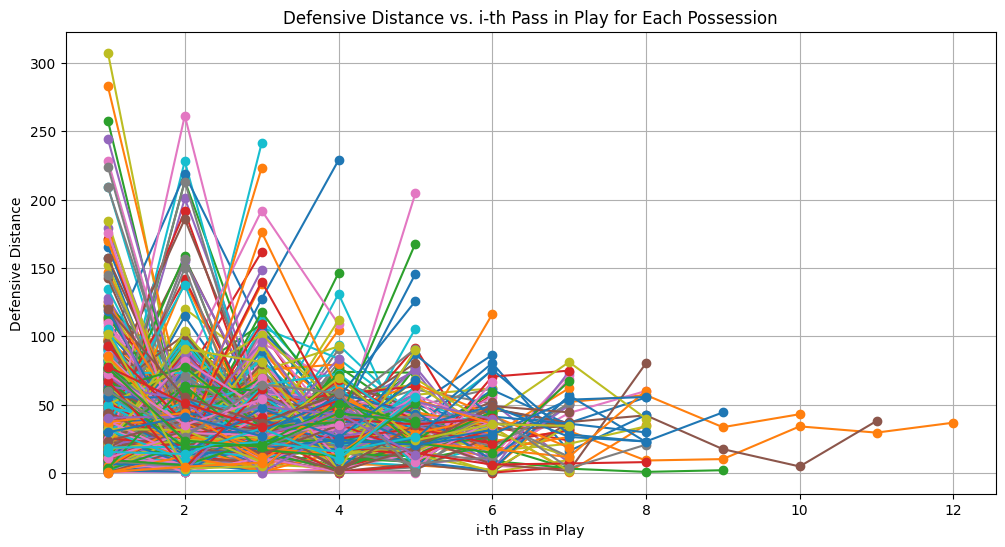

In [3]:
from matplotlib import pyplot as plt

def create_defensive_distance_graph():
    possessions = read_data_for_jonathan()

    plt.figure(figsize=(12, 6))
    for i, possession in enumerate(possessions):
        if 'CombinedPasses' in possession:
            distances = [pass_['distance'] for pass_ in possession['CombinedPasses']]
            plt.plot(range(1, len(distances) + 1), distances, marker='o', label=f'Possession {i+1}')

    plt.xlabel('i-th Pass in Play')
    plt.ylabel('Defensive Distance')
    plt.title('Defensive Distance vs. i-th Pass in Play for Each Possession')
    # plt.legend()
    plt.grid(True)
    plt.show()
create_defensive_distance_graph()

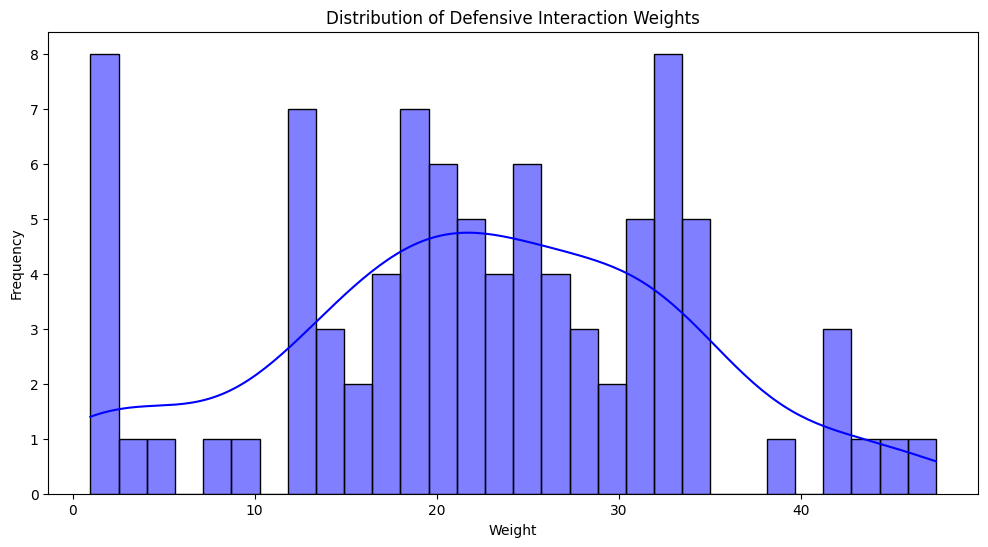

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_weighted_heat_map():
    possessions = read_data_for_jonathan()

    # Aggregating weights from all defensive graphs in the first possession
    all_weights = []

    for defensive_graph in possessions[0]['defensive_graphs']:
        # Extracting weights from the edges of each graph
        weights = nx.get_edge_attributes(defensive_graph, 'weight').values()
        all_weights.extend(weights)
    
    # Here we use a histogram to represent the frequency of different weights
    plt.figure(figsize=(12, 6))
    sns.histplot(all_weights, bins=30, kde=True, color="blue")
    plt.title('Distribution of Defensive Interaction Weights')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.show()

plot_weighted_heat_map()


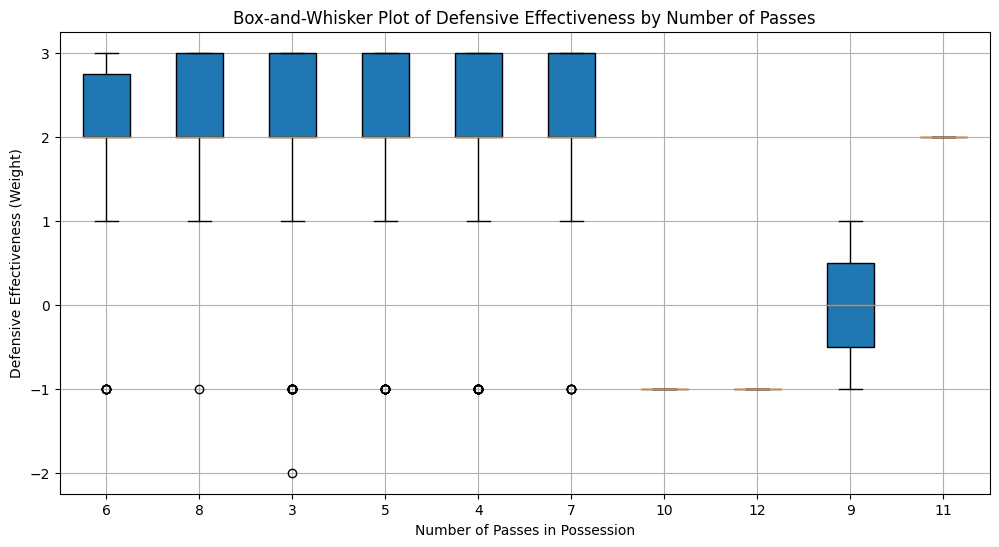

In [16]:
import matplotlib.pyplot as plt

def plot_box_and_whisker_passes_vs_effectiveness():
    possessions = read_data_for_jonathan()

    plt.figure(figsize=(12, 6))

    # Grouping possessions by the number of passes
    passes_to_weights = {}
    for possession in possessions:
        num_passes = len(possession['CombinedPasses']) if 'CombinedPasses' in possession else 0
        if num_passes not in passes_to_weights:
            passes_to_weights[num_passes] = []
        passes_to_weights[num_passes].append(possession["Weight"])

    # Preparing data for the box plot
    labels, data = zip(*passes_to_weights.items())

    plt.boxplot(data, labels=labels, patch_artist=True)
    plt.xlabel('Number of Passes in Possession')
    plt.ylabel('Defensive Effectiveness (Weight)')
    plt.title('Box-and-Whisker Plot of Defensive Effectiveness by Number of Passes')
    plt.grid(True)
    plt.show()

plot_box_and_whisker_passes_vs_effectiveness()